# Pertanyaan Bisnis



1.   apakah ada pengaruh dari kondisi cuaca terhadap jumlah ketertarikan penyewa sepeda?
2.   bagaimana pengaruh musim dalam jumlah penyewa sepeda baik casual maupun registered?



# IMporting Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Loading

Both hour.csv and day.csv have the following fields, except hr which is not available in day.csv

* instant: record index

* dteday : date
* season : season (1:springer, 2:summer, 3:fall, 4:winter)
* yr : year (0: 2011, 1:2012)
* mnth : month ( 1 to 12)
* hr : hour (0 to 23)
* holiday : weather day is holiday or not (extracted from [Web Link])
* weekday : day of the week
* workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
*weathersit :
1: Clear, Few clouds, Partly cloudy, Partly cloudy
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
* temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
* atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
* hum: Normalized humidity. The values are divided to 100 (max)
* windspeed: Normalized wind speed. The values are divided to 67 (max)
* casual: count of casual users
* registered: count of registered users
* cnt: count of total rental bikes including both casual and registered

In [ ]:
!unzip /content/Bike-sharing-dataset.zip

Archive:  /content/Bike-sharing-dataset.zip
replace Readme.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace day.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace hour.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


## loading data day

data pertama yang di load adalah dataframe day.csv

In [ ]:
days_df=pd.read_csv("/content/day.csv")
days_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


kemudian melakukan loading pada dataframe hour.csv

In [ ]:
hour_df=pd.read_csv("/content/hour.csv")
hour_df.head(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


# Data Assesing

langkah pertama yang dapat dilakukan adalah memeriksa tipe tipe data yang terdapat pada masing masing dataframe dengan menggunakan metode info()

In [ ]:
days_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


dapat dilihat jika tidak terdapat perbedaan jumlah pada masing masing kolom pada dataframe akan tetapi untuk lebih meyakinkan kita akan melakukna pengecekan jumlah missing value

In [ ]:
days_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

langkah selanjutnya kita akan melakukan checking pada data yang duplicated

In [ ]:
print("jumlah data yang duplikat pada days df:{}".format(days_df.duplicated().sum()))

jumlah data yang duplikat pada days df:0


berikutnya kita akan memeriksa statistik pada days_df dengan menggunakan methode describe() untuk melihat ringkasan statistik pada dataframe

In [ ]:
days_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


## Assesing hour_df

melakukan pengecekan tipe data pada hour_df

In [ ]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


melakukan pengecekan nilai statistik pada tabel hour_df

In [ ]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


dapat dilihat tidak terdapat nilai yang aneh dalam dataframe

# Data Cleaning

menghapus dataframe dan kolom yang tidak diperlukan yaitu dataframe hour_df dikarenakan pada hour_df hanya berbeda pada kolom hr dan selebihnya sama dengan dataframe day_df

In [ ]:
del hour_df

kemudian hapus kolom yang tidak diperlukan seperti kolom instant karena pada kolom ini tidak memberikan informasi tambahan yang berguna

In [ ]:
drop_col = ['instant', 'windspeed','temp','atemp','hum','yr','mnth','holiday','weekday','workingday']

for i in days_df.columns:
  if i in drop_col:
    days_df.drop(labels=i, axis=1, inplace=True)

days_df.head()

,dteday,season,weathersit,casual,registered,cnt
0,2011-01-01,1,2,331,654,985
1,2011-01-02,1,2,131,670,801
2,2011-01-03,1,1,120,1229,1349
3,2011-01-04,1,1,108,1454,1562
4,2011-01-05,1,1,82,1518,1600


melakukan perubahan nama kolom yang akan digunakan agar dapat dimengerti


In [ ]:
# Mengubah nama judul kolom
days_df.rename(columns={
    'yr': 'year',
    'mnth': 'month',
    'weathersit': 'weather_cond',
    'cnt': 'count'
}, inplace=True)

days_df.head()

,dteday,season,weather_cond,casual,registered,count
0,2011-01-01,1,2,331,654,985
1,2011-01-02,1,2,131,670,801
2,2011-01-03,1,1,120,1229,1349
3,2011-01-04,1,1,108,1454,1562
4,2011-01-05,1,1,82,1518,1600


setelah mengubah nama kolom agar lebih mudah dimengerti, selanjutnya dilakukan perubahan pada kolom yang memiliki value angka menjadi keterangan atau kategorical

In [ ]:
#mengubah nilai pada kolom yang memiliki nilai numeric menjadi kategorikal
days_df['season'] = days_df['season'].map({
    1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'
})
days_df['weather_cond']=days_df['weather_cond'].map({
   1:'Clear',2:'Misty',3:'Light Snow',4:'Heavy Rain'
})

# Exploratory Data Analysys


berdasarkan dari data yang diperoleh diatas dapat disimpulkan jika penyewa sepeda terbanyak terdapat pada bulan september dan penyewa paling sedikit ada pada bulan januari

melakukan pengelompokan jumlah penyewa sepeda berdasarkan keadaan cuaaca

In [ ]:
days_df.groupby(by='weather_cond').agg({
    'count': ['max', 'min', 'mean', 'sum']
})

count                           
               max  min         mean      sum
weather_cond                                 
Clear         8714  431  4876.786177  2257952
Light Snow    4639   22  1803.285714    37869
Misty         8362  605  4035.862348   996858

Berdasarkan hasil diatas, dapat disimpulkan bahwa para penyewa sepeda cenderung menyewa pada saat cuaca ketika sedang cerah atau mendung. Sangat sedikit ketika salju turun dan tidak ada ketika cuaca sedang sangat buruk atau hujan deras.

langkah berikutnya untuk menjawab pertanyaan kedua maka dilakukan pengelompokan penyewa sepeda berdasarkan dengan musim

In [ ]:
days_df.groupby(by='season').agg({
    'casual': 'mean',
    'registered': 'mean',
    'count': ['max', 'min', 'mean', 'sum']
})

casual   registered count                            
               mean         mean   max   min         mean      sum
season                                                            
Fall    1202.611702  4441.691489  8714  1115  5644.303191  1061129
Spring   334.928177  2269.204420  7836   431  2604.132597   471348
Summer  1106.097826  3886.233696  8362   795  4992.331522   918589
Winter   729.112360  3999.050562  8555    22  4728.162921   841613

Berdasarkan hasil analisis diatas, para penyewa sepeda baik Casual Dan Registered, suka sekali pada musim gugur (Fall), dapat dilihat dari rata-ratanya. Sedangkan yang paling sedikit adalah pada musim semi (Spring) dengan rata-rata yang paling kecil.

# Data Visualization

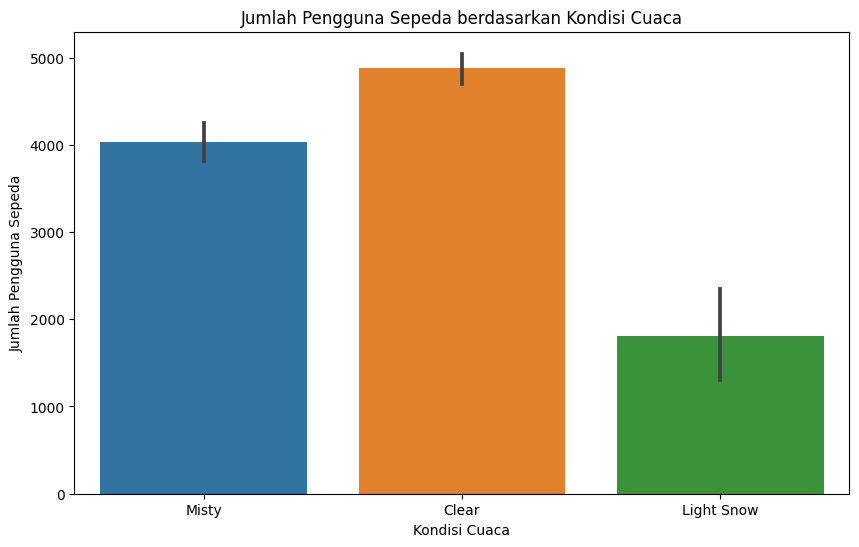

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(
    x='weather_cond',
    y='count',
    data=days_df)

plt.title('Jumlah Pengguna Sepeda berdasarkan Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah Pengguna Sepeda')
plt.show()

berdasarkan dari visualisasi data diatas terdapat hubungan antara kondisi cuaca dan jumlah penyewa sepeda yang diman penyewaan sepeda paling banyak diminati ketika cuaca dalam kondisi 1 yaitu ketika cuaca sedang cerah/sedikit mendung kemudian diikuti oleh cuaca 2 yang dimana cuaca sedang mendung dan yang terakhir cuaca 3 yaitu  ketika cuaca sedikit bersalju

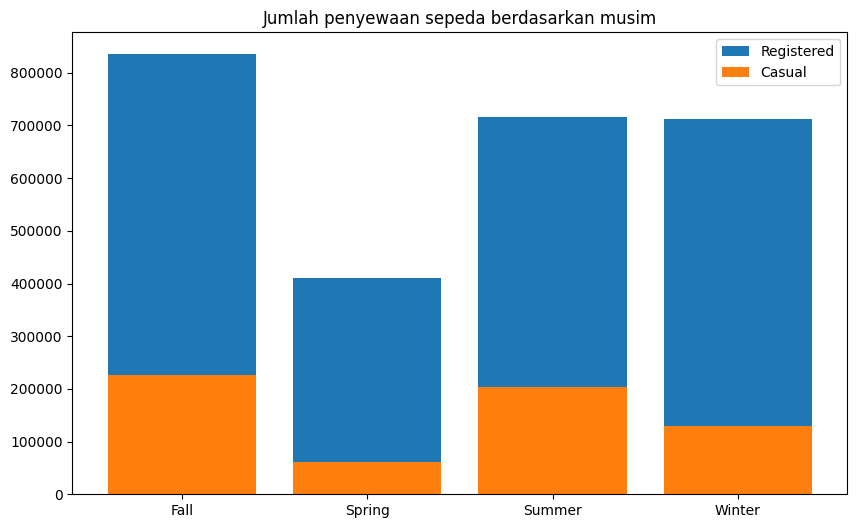

In [ ]:
# Mengelompokkan data berdasarkan musim dan menghitung jumlah penggunaan terdaftar dan tidak terdaftar
seasonal_usage = days_df.groupby('season')[['registered', 'casual']].sum().reset_index()

plt.figure(figsize=(10, 6))

# Membuat
plt.bar(
    seasonal_usage['season'],
    seasonal_usage['registered'],
    label='Registered',
    color='tab:blue'
)

plt.bar(
    seasonal_usage['season'],
    seasonal_usage['casual'],
    label='Casual',
    color='tab:orange'
)

plt.xlabel(None)
plt.ylabel(None)
plt.title('Jumlah penyewaan sepeda berdasarkan musim')
plt.legend()
plt.show()

Berdasarkan hasil analisis diatas menggunakan barplot, dapat disimpulkan bahwa di semua musim yang paling dinikmati bagi para pengguna sepeda (Casual dan Registered) adalah musim gugur (Fall), lalu diikuti dengan musim panas (Summer), musim dingin (Winter), dan diakhiri dengan musim semi (Spring).